In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def fit_data(X_train,y_train,alpha=0.001,regularization_param=0.01,num_iterations=1000):
    
    y_new=np.where(y_train <= 0,-1,1)
    
    num_samples=X_train.shape[0]
    
    num_dimensions=X_train.shape[1]
    
    w=np.zeros(num_dimensions)
    
    b=0
    
    for _ in range(num_iterations):
        for index,x_index in enumerate(X_train):
            if((y_new[index]*(np.dot(x_index,w)-b)>=1)):
                w-=alpha*(2*regularization_param*w)
            else:
                w-=alpha*(2*regularization_param*w-np.dot(x_index,y_new[index]))
                b-=alpha*(y_new[index])    
    return w,b

In [3]:
def predict(X_test,w,b):
    return np.sign(np.dot(X_test,w)-b)

In [4]:
from sklearn import datasets
X_train, y_train =  datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y_train = np.where(y_train == 0, -1, 1)
X_test,y_test=datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y_test = np.where(y_test == 0, -1, 1)

In [5]:
print(X_train.shape)
print(y_train.shape)

(500, 2)
(500,)


In [6]:
w,b=fit_data(X_train,y_train)
print(w,b)

[0.49411246 0.21453907] -0.4280000000000003


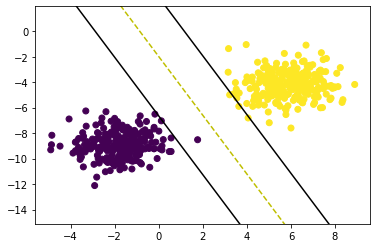

In [7]:
def visualize_svm():
     def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]

     fig = plt.figure()
     ax = fig.add_subplot(1,1,1)
     plt.scatter(X_train[:,0], X_train[:,1], marker='o',c=y_train)

     x0_1 = np.amin(X_train[:,0])
     x0_2 = np.amax(X_train[:,0])

     x1_1 = get_hyperplane_value(x0_1, w, b, 0)
     x1_2 = get_hyperplane_value(x0_2, w, b, 0)

     x1_1_m = get_hyperplane_value(x0_1,w, b, -1)
     x1_2_m = get_hyperplane_value(x0_2,w, b, -1)

     x1_1_p = get_hyperplane_value(x0_1,w, b, 1)
     x1_2_p = get_hyperplane_value(x0_2,w, b, 1)

     ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
     ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
     ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

     x1_min = np.amin(X_train[:,1])
     x1_max = np.amax(X_train[:,1])
     ax.set_ylim([x1_min-3,x1_max+3])

     plt.show()

visualize_svm()

In [214]:
print(w,b)
result=predict(X_test,w,b)
acc=0
for i in range(len(X_test)):
    if(result[i]==y_test[i]):
        acc+=1
print(acc/len(X_test))

[0.49411246 0.21453907] -0.4280000000000003
1.0


In [230]:
from sklearn.preprocessing import StandardScaler
iris=datasets.load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]
print(np.unique(iris.target))
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
w,b=fit_data(X_std,y)
print(w,b)

[0 1 2]
[ 1.51751652 -1.25609721] -0.3030000000000002


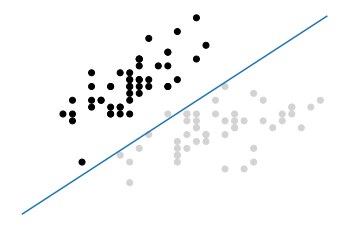

In [231]:
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_std[:,0], X_std[:,1], c=color)

a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (b) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();